In [1]:
#Import all library needed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
#Generate synthetic dataset
X,y = make_blobs(n_samples=1000, 
                 n_features=2, 
                 centers=[[4,3],[-2,-2],[1,2]], 
                 cluster_std=0.8, random_state=1)
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


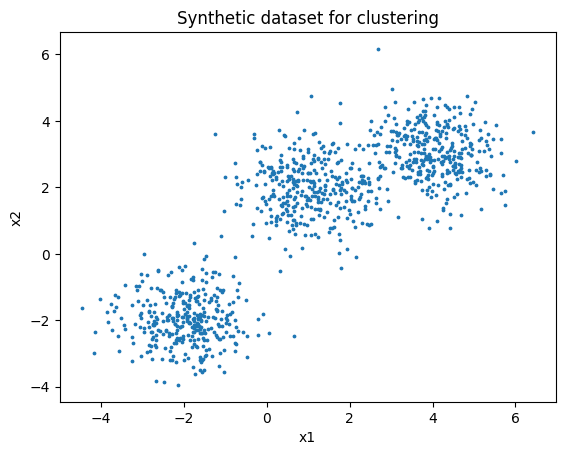

In [3]:
#Visualize the dataset
plt.scatter(X[:,0], X[:,1], s=3)
plt.title('Synthetic dataset for clustering')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**KMean Clustering Model**

c:\Users\new user\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\new user\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


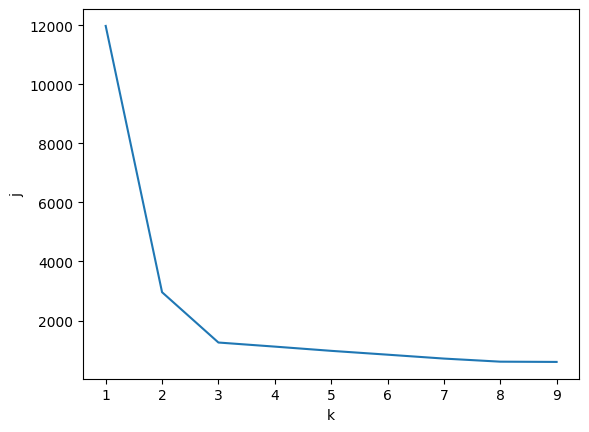

In [4]:
#Find optimum k
J = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    J.append(kmeans.inertia_)
plt.plot(K,J)
plt.xlabel('k')
plt.ylabel('j')
plt.xticks(K)
plt.show()
#In this plot, we can see the optimum 'j' is 3

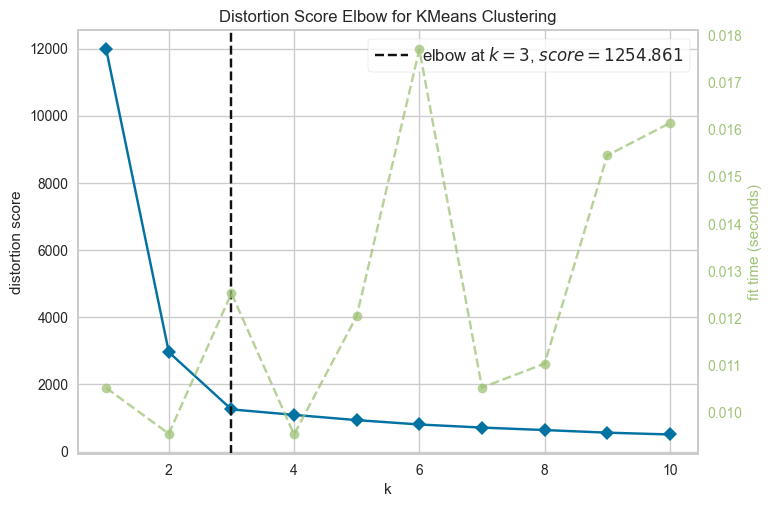

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
#Find the elbow automatically
from yellowbrick.cluster import KElbowVisualizer
yellow_kmeansModel = KMeans(n_init='auto')
visualizer = KElbowVisualizer(yellow_kmeansModel, k=(1,11))
visualizer.fit(X)
visualizer.show()

[[-1.96886751 -1.97481604]
 [ 4.03599858  3.05231399]
 [ 1.0003116   1.97664483]]


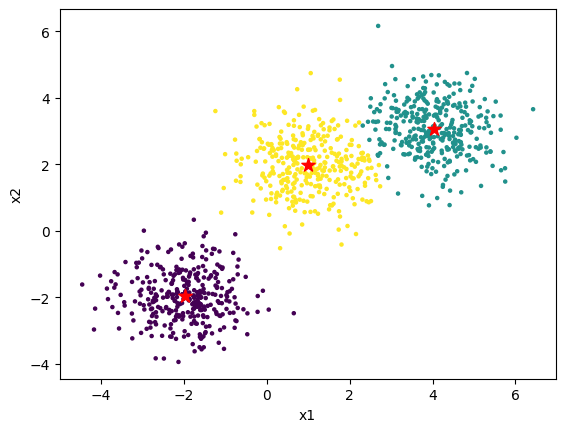

In [6]:
#kmeans clustering using optimum k = 3
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
cluster = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c = cluster, s=5)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='r', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [7]:
#Evaluate Model
from sklearn.metrics import silhouette_score
print("Silhouette Score: ", silhouette_score(X, cluster))

Silhouette Score:  0.6145258490072988


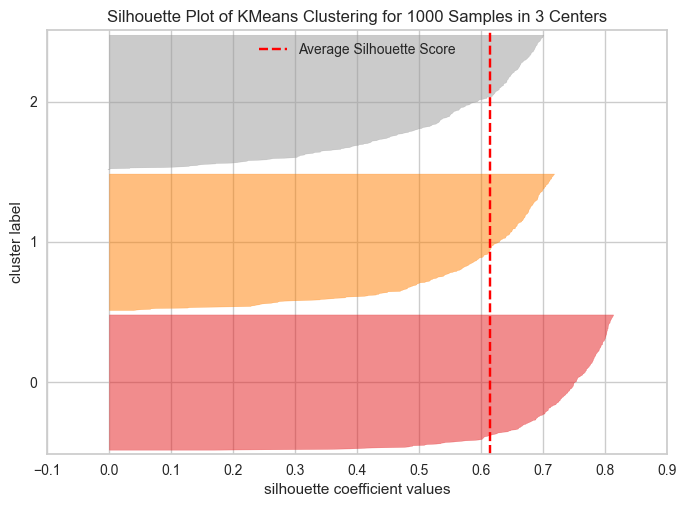

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(X)
visualizer.show()

In [13]:
from datasets import load_dataset
ds = load_dataset("Tom-nerd/apple-images")

c:\Users\new user\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Trying to resume download...
Trying to resume download...
Trying to resume download...
Trying to resume download...
Generating train split: 100%|██████████| 204/204 [00:00<00:00, 674.00 examples/s]


{'image': <PIL.Image.Image image mode=RGB size=4032x3024>}